Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving bank.csv to bank.csv
First 5 rows of the dataset:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Missing values:
 age          0
job          0
marita

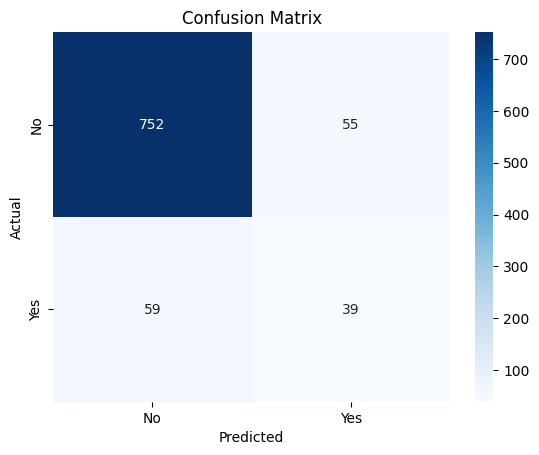

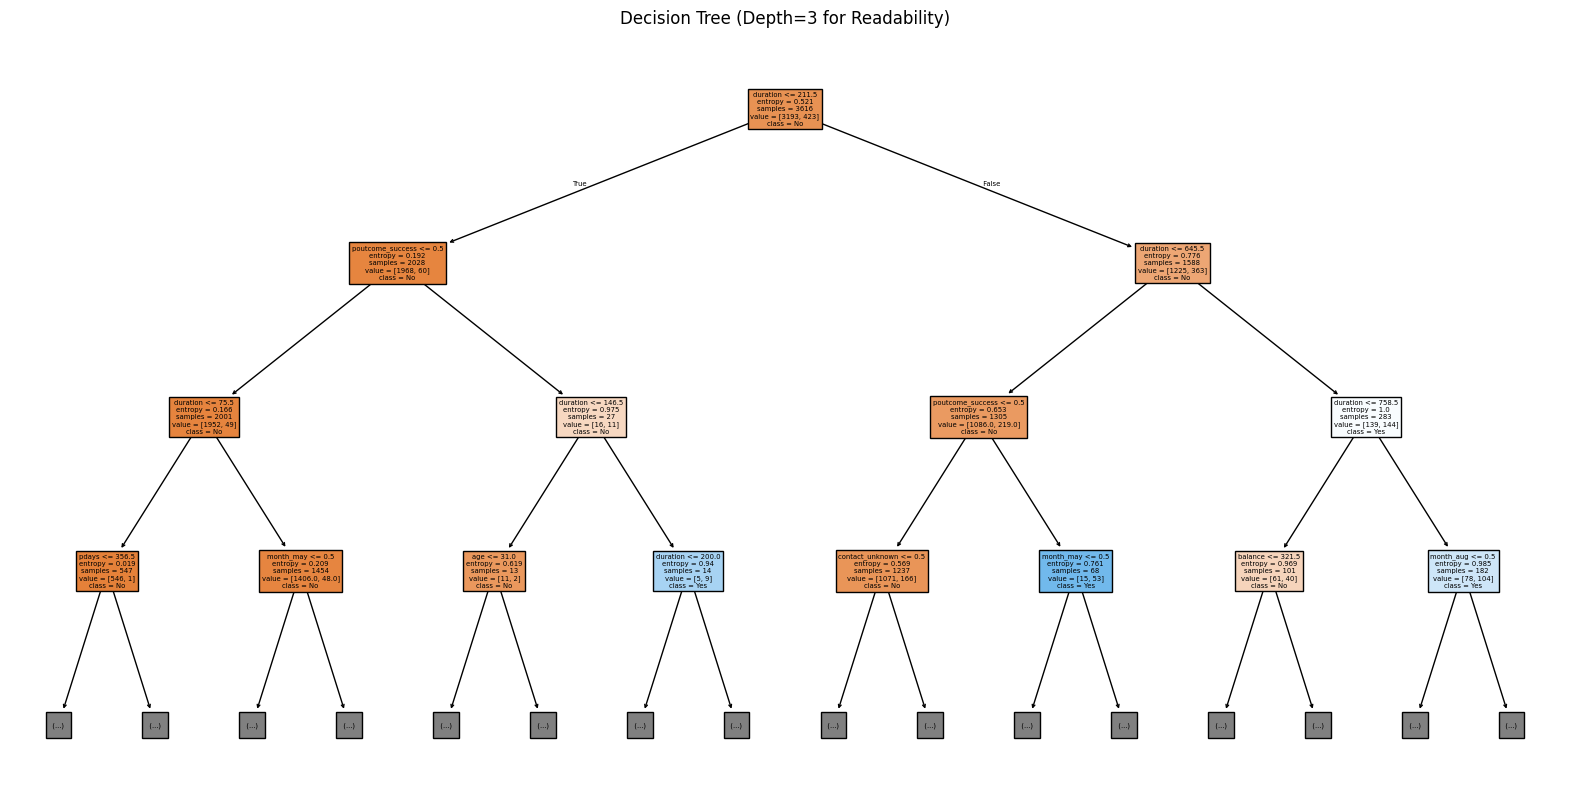

In [8]:
# STEP 1: Mount Google Drive (Optional)
from google.colab import drive
drive.mount('/content/drive')  # You can skip this if not using Drive

# STEP 2: Upload 'bank.csv'
from google.colab import files
uploaded = files.upload()  # Upload bank.csv manually when prompted

# STEP 3: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# STEP 4: Load the Dataset
df = pd.read_csv('bank.csv', sep=';')
print("First 5 rows of the dataset:")
print(df.head())

# STEP 5: Check for Null Values
print("\nMissing values:\n", df.isnull().sum())

# STEP 6: Encode Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True)

# STEP 7: Define Features and Target
X = df_encoded.drop('y_yes', axis=1)  # Features
y = df_encoded['y_yes']               # Target (yes = 1, no = 0)

# STEP 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 9: Train the Decision Tree Model
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# STEP 10: Make Predictions
y_pred = clf.predict(X_test)

# STEP 11: Evaluate the Model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# STEP 12: Visualize the Decision Tree (Optional but Helpful)
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No", "Yes"], max_depth=3)
plt.title("Decision Tree (Depth=3 for Readability)")
plt.show()
